In [258]:
#Visualization of Complex Data Final Project

#load packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import seaborn as sns

In [259]:
#load restaurant file; setting Restaurant ID as index
df = pd.read_csv("dataset.csv", index_col = [0], low_memory=False, encoding = "ISO-8859-1")
df.head()

,Country Code,City,Cuisines,Price range,Aggregate rating
Restaurant ID,,,,,
6317637,162,Makati City,"French, Japanese, Desserts",3,4.8
6304287,162,Makati City,Japanese,3,4.5
6300002,162,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4,4.4
6318506,162,Mandaluyong City,"Japanese, Sushi",4,4.9
6314302,162,Mandaluyong City,"Japanese, Korean",4,4.8


In [260]:
df['Country Code'] = df['Country Code'].map({1: 'India', 14: 'Australia', 30: 'Brazil', 37: 'Canada',
                                            94: 'Indonesia', 148: 'New Zealand', 162: 'Philippines',
                                            166: 'Qatar', 184: 'Singapore', 189: 'South Africa',
                                            191: 'Sri Lanka', 208: 'Turkey', 214: 'UAE',
                                            215: 'United Kingdom', 216: 'United States'})

In [261]:
df.head()

,Country Code,City,Cuisines,Price range,Aggregate rating
Restaurant ID,,,,,
6317637,Philippines,Makati City,"French, Japanese, Desserts",3,4.8
6304287,Philippines,Makati City,Japanese,3,4.5
6300002,Philippines,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4,4.4
6318506,Philippines,Mandaluyong City,"Japanese, Sushi",4,4.9
6314302,Philippines,Mandaluyong City,"Japanese, Korean",4,4.8


In [262]:
df = df.rename(columns = {'Country Code':'Country', 'Price range': 'Price', 'Aggregate rating': 'Rating'})
df.head()

,Country,City,Cuisines,Price,Rating
Restaurant ID,,,,,
6317637,Philippines,Makati City,"French, Japanese, Desserts",3,4.8
6304287,Philippines,Makati City,Japanese,3,4.5
6300002,Philippines,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4,4.4
6318506,Philippines,Mandaluyong City,"Japanese, Sushi",4,4.9
6314302,Philippines,Mandaluyong City,"Japanese, Korean",4,4.8


In [263]:
df.isna().sum()

Country     0
City        0
Cuisines    0
Price       0
Rating      0
dtype: int64

In [315]:
df.to_csv('final_dataset.csv')

In [264]:
country = df['Country'].unique()
country

array(['Philippines', 'Brazil', 'United States', 'Australia', 'Canada',
       'Singapore', 'UAE', 'India', 'Indonesia', 'New Zealand',
       'United Kingdom', 'Qatar', 'South Africa', 'Sri Lanka', 'Turkey'],
      dtype=object)

In [265]:
np.savetxt("country.csv", country, header="Country", fmt='%s')

In [266]:
country_num = df.groupby('Country').size()
country_num = pd.DataFrame({'Country':country_num.index, 'Number':country_num.values})
country_num.index = np.arange(1, len(country_num)+1)
country_num

,Country,Number
1,Australia,24
2,Brazil,60
3,Canada,4
4,India,8652
5,Indonesia,21
6,New Zealand,40
7,Philippines,22
8,Qatar,20
9,Singapore,20
10,South Africa,60


In [267]:
rating = df.groupby('Country')['Rating'].mean()
country_num['Rating'] = rating.values
country_num['Rating'] = country_num['Rating'].round(2)
price = df.groupby('Country')['Price'].mean()
country_num['Price'] = price.values
country_num['Price'] = country_num['Price'].round(2)
country_num

,Country,Number,Rating,Price
1,Australia,24,3.66,2.12
2,Brazil,60,3.76,3.40
3,Canada,4,3.58,2.50
4,India,8652,2.52,1.72
5,Indonesia,21,4.30,2.95
6,New Zealand,40,4.26,3.15
7,Philippines,22,4.47,3.36
8,Qatar,20,4.06,3.65
9,Singapore,20,3.58,3.65
10,South Africa,60,4.21,3.58


In [268]:
country_num.to_csv('country_num.csv')

In [269]:
cuisine_num = df['Cuisines'].str.split(',\s+', expand=True).stack().value_counts()
cuisine_num = pd.DataFrame({'Cuisine':cuisine_num.index, 'Number':cuisine_num.values})
cuisine_num.index = np.arange(1, len(cuisine_num)+1)
cuisine_num

,Cuisine,Number
1,North Indian,3960
2,Chinese,2735
3,Fast Food,1986
4,Mughlai,995
5,Italian,764
6,Bakery,745
7,Continental,736
8,Cafe,703
9,Desserts,653
10,South Indian,636


In [270]:
df['Cuisines'] = df['Cuisines'].replace({'North Indian':'Indian', 'South Indian':'Indian', 'Modern Indian':'Indian', 
                                    'Coffee and Tea':'Beverages', 'Drinks Only':'Beverages', 'Bubble Tea':'Beverages', 
                                    'Ramen':'Japanese', 'World Cuisine':'International', 'Asian Fusion':'Asian', 
                                    'Gourmet Fast Food':'Fast Food'}, regex=True)

In [271]:
df['Cuisines'] = df['Cuisines'].str.split(', ').apply(set).str.join(', ')
cuisine_num = df['Cuisines'].str.split(',\s+', expand=True).stack().value_counts()
cuisine_num = pd.DataFrame({'Cuisine':cuisine_num.index, 'Number':cuisine_num.values})
cuisine_num.index = np.arange(1, len(cuisine_num)+1)
cuisine_num

,Cuisine,Number
1,Indian,4259
2,Chinese,2733
3,Fast Food,1987
4,Mughlai,994
5,Italian,764
6,Bakery,744
7,Continental,736
8,Cafe,703
9,Desserts,653
10,Street Food,562


In [272]:
cuisine_num.to_csv('cuisine_num.csv')

In [273]:
indian = df[df['Cuisines'].str.contains("Indian")]
chinese = df[df['Cuisines'].str.contains("Chinese")]
ff = df[df['Cuisines'].str.contains("Fast Food")]
mughlai = df[df['Cuisines'].str.contains("Mughlai")]
italian = df[df['Cuisines'].str.contains("Italian")]

In [274]:
country_num_indian = indian.groupby('Country').size()
country_num_indian = pd.DataFrame({'Country':country_num_indian.index, 'Number':country_num_indian.values})
country_num_indian.index = np.arange(1, len(country_num_indian)+1)

In [275]:
rating = indian.groupby('Country')['Rating'].mean()
country_num_indian['Rating'] = rating.values
country_num_indian['Rating'] = country_num_indian['Rating'].round(2)
price = indian.groupby('Country')['Price'].mean()
country_num_indian['Price'] = price.values
country_num_indian['Price'] = country_num_indian['Price'].round(2)
country_num_indian

,Country,Number,Rating,Price
1,Brazil,1,3.10,3.00
2,India,4191,2.50,1.84
3,Philippines,2,4.65,4.00
4,Qatar,8,4.01,3.38
5,Singapore,1,3.00,3.00
6,South Africa,2,4.35,4.00
7,Sri Lanka,3,2.80,2.33
8,UAE,26,4.34,3.08
9,United Kingdom,17,4.13,2.53
10,United States,8,3.46,1.88


In [276]:
country_num_indian.to_csv('country_num_indian.csv')

In [277]:
country_num_chinese = chinese.groupby('Country').size()
country_num_chinese = pd.DataFrame({'Country':country_num_chinese.index, 'Number':country_num_chinese.values})
country_num_chinese.index = np.arange(1, len(country_num_chinese)+1)

In [278]:
rating = chinese.groupby('Country')['Rating'].mean()
country_num_chinese['Rating'] = rating.values
country_num_chinese['Rating'] = country_num_chinese['Rating'].round(2)
price = chinese.groupby('Country')['Price'].mean()
country_num_chinese['Price'] = price.values
country_num_chinese['Price'] = country_num_chinese['Price'].round(2)
country_num_chinese

,Country,Number,Rating,Price
1,Canada,1,3.00,2.00
2,India,2688,2.60,1.89
3,New Zealand,1,4.30,2.00
4,Philippines,1,4.40,3.00
5,Qatar,3,4.23,3.33
6,Singapore,3,3.43,3.67
7,Sri Lanka,3,2.77,2.67
8,UAE,9,4.14,3.33
9,United Kingdom,2,4.75,4.00
10,United States,22,3.99,1.64


In [279]:
country_num_chinese.to_csv('country_num_chinese.csv')

In [280]:
country_num_ff = ff.groupby('Country').size()
country_num_ff = pd.DataFrame({'Country':country_num_ff.index, 'Number':country_num_ff.values})
country_num_ff.index = np.arange(1, len(country_num_ff)+1)

In [281]:
rating = ff.groupby('Country')['Rating'].mean()
country_num_ff['Rating'] = rating.values
country_num_ff['Rating'] = country_num_ff['Rating'].round(2)
price = ff.groupby('Country')['Price'].mean()
country_num_ff['Price'] = price.values
country_num_ff['Price'] = country_num_ff['Price'].round(2)
country_num_ff

,Country,Number,Rating,Price
1,Brazil,3,3.93,3.00
2,India,1963,2.55,1.45
3,New Zealand,1,4.50,1.00
4,Singapore,1,3.20,4.00
5,South Africa,1,3.60,3.00
6,Sri Lanka,3,4.03,2.67
7,UAE,5,3.76,2.60
8,United Kingdom,4,3.20,1.50
9,United States,6,3.78,1.33


In [282]:
country_num_ff.to_csv('country_num_ff.csv')

In [283]:
country_num_mughlai = mughlai.groupby('Country').size()
country_num_mughlai = pd.DataFrame({'Country':country_num_mughlai.index, 'Number':country_num_mughlai.values})
country_num_mughlai.index = np.arange(1, len(country_num_mughlai)+1)

In [284]:
rating = mughlai.groupby('Country')['Rating'].mean()
country_num_mughlai['Rating'] = rating.values
country_num_mughlai['Rating'] = country_num_mughlai['Rating'].round(2)
price = mughlai.groupby('Country')['Price'].mean()
country_num_mughlai['Price'] = price.values
country_num_mughlai['Price'] = country_num_mughlai['Price'].round(2)
country_num_mughlai

,Country,Number,Rating,Price
1,India,991,2.61,2.00
2,UAE,3,4.10,3.33


In [285]:
country_num_mughlai.to_csv('country_num_mughlai.csv')

In [286]:
country_num_italian = italian.groupby('Country').size()
country_num_italian = pd.DataFrame({'Country':country_num_italian.index, 'Number':country_num_italian.values})
country_num_italian.index = np.arange(1, len(country_num_italian)+1)

In [287]:
rating = italian.groupby('Country')['Rating'].mean()
country_num_italian['Rating'] = rating.values
country_num_italian['Rating'] = country_num_italian['Rating'].round(2)
price = italian.groupby('Country')['Price'].mean()
country_num_italian['Price'] = price.values
country_num_italian['Price'] = country_num_italian['Price'].round(2)
country_num_italian

,Country,Number,Rating,Price
1,Australia,1,3.80,1.00
2,Brazil,6,4.10,4.00
3,Canada,1,4.30,4.00
4,India,682,3.50,2.66
5,Indonesia,2,4.35,3.00
6,New Zealand,3,4.43,4.00
7,Philippines,4,4.12,3.50
8,Qatar,1,4.50,4.00
9,Singapore,2,3.65,3.50
10,South Africa,7,4.07,3.86


In [288]:
country_num_italian.to_csv('country_num_italian.csv')

In [289]:
#ratings_num = df['Cuisines'].str.split(',\s+', expand=True).stack().value_counts()
ratings_num = df.groupby(["Country", "Rating"]).size()
ratings_num

Country         Rating
Australia       2.4        1
                2.6        1
                2.9        1
                3.2        1
                3.4        1
                3.5        3
                3.6        3
                3.7        3
                3.8        4
                4.1        3
                4.4        2
                4.6        1
Brazil          0.0        5
                3.0        1
                3.1        3
                3.2        2
                3.3        1
                3.4        1
                3.5        1
                3.6        3
                3.7        3
                3.8        2
                3.9        2
                4.0        3
                4.1        3
                4.2        4
                4.3        6
                4.4        4
                4.5        2
                4.6        6
                          ..
United Kingdom  4.2        5
                4.3        5
                4.4 

([<matplotlib.axis.XTick at 0x1a21d57a20>,
 <a list of 9 Text xticklabel objects>)

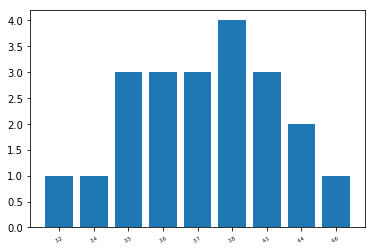

In [312]:
best_rated = df.loc[(df['Rating'] >= 3)]
best_rated = best_rated[['Country','Rating']]
best_rated = best_rated.groupby(["Country", "Rating"]).size()
plt.bar(np.arange(len(best_rated['Australia'].index)), best_rated['Australia'].values)
plt.xticks(np.arange(len(best_rated['Australia'].index)), best_rated['Australia'].index, fontsize=5, rotation=30)

In [313]:
best_rated = pd.DataFrame({'Rating':best_rated.index, 'Number':best_rated.values})
best_rated.index = np.arange(1, len(best_rated)+1)

In [314]:
best_rated.to_csv('best_rated.csv')

In [291]:
best_rated_cuisine_num = best_rated['Cuisines'].str.split(',\s+', expand=True).stack().value_counts()
best_rated_cuisine_num

Indian            67
American          44
Italian           38
Cafe              38
Continental       31
Desserts          31
Asian             25
Chinese           23
Seafood           21
Burger            21
European          19
Pizza             18
Mexican           16
Mediterranean     16
Japanese          15
Ice Cream         12
Bar Food          12
Fast Food         12
Sandwich          11
Brazilian          9
Beverages          9
Sushi              8
Thai               8
Steak              8
International      8
Mughlai            7
Bakery             7
French             6
BBQ                5
Southern           5
                  ..
Finger Food        2
Spanish            2
Southwestern       2
Middle Eastern     2
British            2
Korean             2
Latin American     2
Greek              2
Vietnamese         1
Turkish Pizza      1
Burmese            1
Deli               1
Kerala             1
Teriyaki           1
African            1
Argentine          1
Salad        

In [292]:
ratings_price_num = df.groupby(["Country", "Rating", "Price"]).size()
ratings_price_num

Country        Rating  Price
Australia      2.4     3         1
               2.6     4         1
               2.9     2         1
               3.2     2         1
               3.4     2         1
               3.5     2         2
                       3         1
               3.6     1         1
                       2         2
               3.7     1         1
                       2         2
               3.8     1         2
                       2         1
                       3         1
               4.1     2         3
               4.4     3         2
               4.6     2         1
Brazil         0.0     1         1
                       2         2
                       3         2
               3.0     2         1
               3.1     3         2
                       4         1
               3.2     2         1
                       4         1
               3.3     4         1
               3.4     4         1
               3.5     4  

In [296]:
ratings_price_num = df.groupby(["Country", "Rating", "Price"]).size()
ratings_price_num['India']

Rating  Price
0.0     1        1699
        2         396
        3          33
        4          11
1.8     3           1
1.9     1           1
        2           1
2.0     1           3
        2           2
        3           1
        4           1
2.1     1           6
        2           7
        3           2
2.2     1           9
        2          15
        3           1
        4           1
2.3     1          13
        2          32
        3           1
2.4     1          29
        2          39
        3          12
        4           3
2.5     1          32
        2          66
        3          10
        4           1
2.6     1          68
                 ... 
4.2     2          43
        3          63
        4          18
4.3     1          15
        2          32
        3          34
        4          19
4.4     1           3
        2          22
        3          35
        4          14
4.5     1           6
        2           9
        3         

In [323]:
df['City'].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Brasí_lia', 'Rio de Janeiro', 'Sí£o Paulo',
       'Albany', 'Armidale', 'Athens', 'Augusta', 'Balingup',
       'Beechworth', 'Boise', 'Cedar Rapids/Iowa City', 'Chatham-Kent',
       'Clatskanie', 'Cochrane', 'Columbus', 'Consort', 'Dalton',
       'Davenport', 'Des Moines', 'Dicky Beach', 'Dubuque',
       'East Ballina', 'Fernley', 'Flaxton', 'Forrest', 'Gainesville',
       'Hepburn Springs', 'Huskisson', 'Inverloch', 'Lakes Entrance',
       'Lakeview', 'Lincoln', 'Lorn', 'Macedon', 'Macon', 'Mayfield',
       'Mc Millan', 'Middleton Beach', 'Monroe', 'Montville',
       'Ojo Caliente', 'Orlando', 'Palm Cove', 'Paynesville', 'Penola',
       'Pensacola', 'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'Trentham East', '

In [324]:
uni = pd.DataFrame(df['City'].unique())
uni

,0
0,Makati City
1,Mandaluyong City
2,Pasay City
3,Pasig City
4,Quezon City
5,San Juan City
6,Santa Rosa
7,Tagaytay City
8,Taguig City
9,Brasí_lia
